# Laboratorio 2 - Visión por Computadora

- Diego Estuardo Lemus López - 21469
- José Pablo Kiesling Lange - 21581
- Herber Sebastián Silva Muñoz - 21764

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import cv2 as cv

import skimage as ski
from skimage.filters import threshold_niblack
from skimage import morphology as mo

## 2. Consideramos de nuevo la imagen rice.jpg. Hacer lo siguiente

In [2]:
image_path = 'assets/rice.jpg'
image = plt.imread(image_path)
image_original = image

In [3]:
image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

### a) Binarizar la imagen mediante el método de Otsu, o usando algún otro método no local

#### Segmentación binaria

In [4]:
threshold = threshold_niblack(image, window_size=51, k=-0.48)
image = image > threshold

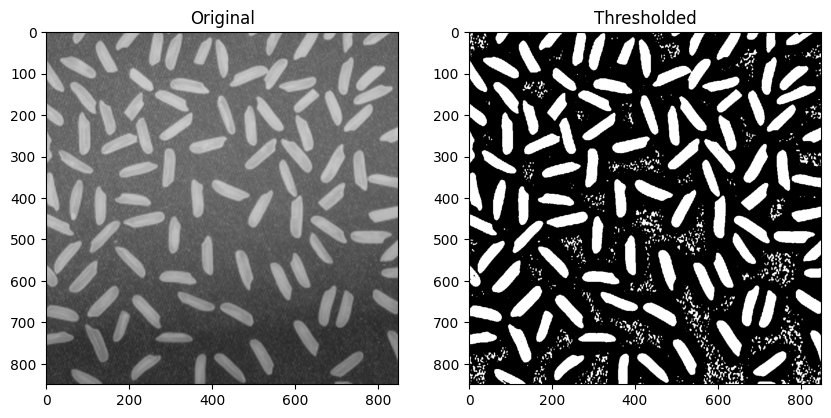

In [5]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(image_original, cmap='gray')
plt.title("Original")
plt.subplot(1,2,2)
plt.imshow(image, cmap='gray')
plt.title("Thresholded")
plt.show()

### b) Aplicar operaciones morfológicas adecuadas para limpiar el ruido de la binarización. Explicar por qué está eligiendo estas transformaciones morfológicas.

#### opening para eliminar ruido

In [6]:
disk = mo.disk(5)
image = mo.binary_opening(image, disk)

In [7]:
disk = mo.disk(1)
image = mo.binary_erosion(image, disk)

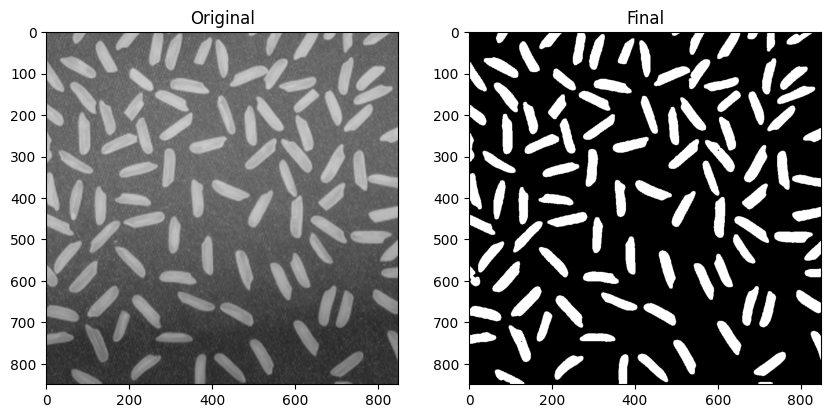

In [8]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(image_original, cmap='gray')
plt.title("Original")
plt.subplot(1,2,2)
plt.imshow(image, cmap='gray')
plt.title("Final")
plt.show()

In [9]:
C, M = mo.label(image, background=0, return_num=True, connectivity=2)

In [10]:
print("Number of grains:", M)

Number of grains: 100


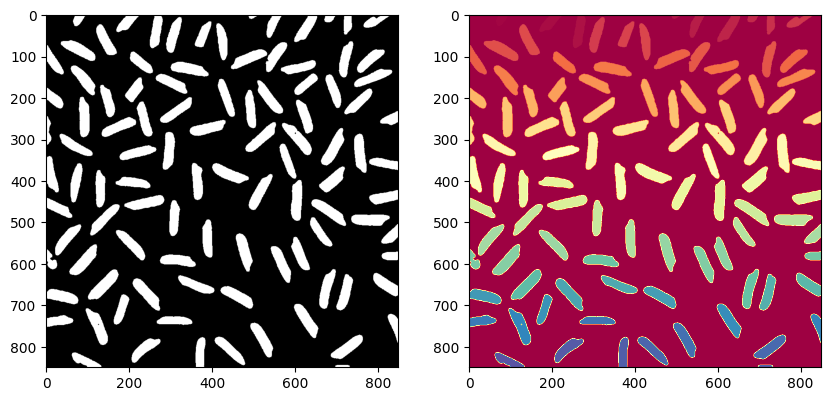

In [11]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(C, plt.cm.Spectral)
plt.show()